This version will remove company response public and to customer from features.  Because the end product is for bank, they will not have response when using my model

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
complaints = pd.read_csv('data/Consumer_Complaints.csv', dtype="category")

### Keep only complaints with "Consumer disputed?" not Nan

In [3]:
print("The number of all complaints is ", len(complaints))
complaints_labeled = complaints.dropna(subset=["Consumer disputed?"])
print("The number of complaints with 'Consumer disputed?' labeled is ", len(complaints_labeled))

The number of all complaints is  1285487
The number of complaints with 'Consumer disputed?' labeled is  768501


### Remove all na for now for simplicity and choose features
Compared to classifier_V1, do not use "Company response to consumer" as a feature

In [4]:

data = complaints_labeled.loc[:, ['Product', 'Issue', 'Company',
       'State', 'Timely response?', 'Consumer disputed?']]

print(len(data))
data = data.dropna()
print("length after dropna: ", str(len(data)))


768501
length after dropna:  762850


In [5]:
len(data[data["Consumer disputed?"] == "Yes"]) / len(data[data["Consumer disputed?"] == "No"])

0.23950760911599067

### One hot coding for categorial data

In [6]:
data_dummies = pd.get_dummies(data)
print("Features after get_dummies: \n", list(data_dummies.columns))

Features after get_dummies: 
 ['Product_Checking or savings account', 'Product_Credit card or prepaid card', 'Product_Credit reporting, credit repair services, or other personal consumer reports', 'Product_Debt collection', 'Product_Money transfer, virtual currency, or money service', 'Product_Mortgage', 'Product_Payday loan, title loan, or personal loan', 'Product_Student loan', 'Product_Vehicle loan or lease', 'Product_Bank account or service', 'Product_Consumer Loan', 'Product_Credit card', 'Product_Credit reporting', 'Product_Money transfers', 'Product_Other financial service', 'Product_Payday loan', 'Product_Prepaid card', 'Product_Virtual currency', 'Issue_Advertising', 'Issue_Advertising and marketing, including promotional offers', 'Issue_Applying for a mortgage', 'Issue_Applying for a mortgage or refinancing an existing mortgage', 'Issue_Attempts to collect debt not owed', "Issue_Can't contact lender or servicer", "Issue_Can't stop withdrawals from your bank account", "Issue_C

In [7]:
X = data_dummies.loc[:, "Product_Checking or savings account":"Timely response?_Yes"]
y = data_dummies["Consumer disputed?_Yes"].values
print(X.shape)
print(y.shape)

(762850, 5534)
(762850,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Add a function to evaluate the model
The function will return confusion matrix and f1_score

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

def model_evaluate(model, X_test, y_test):
    pred_model = model.predict(X_test)
    print("accuracy: {:.2f}".format(model.score(X_test, y_test)))
    confusion = confusion_matrix(y_test, pred_model) 
    print("Confusion matrix:\n{}".format(confusion))
    print("f1 score: {:.2f}".format(f1_score(y_test, pred_model)))

### Use dummy classifier to see the baseline

In [14]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
model_evaluate(dummy, X_test, y_test)


accuracy: 0.69
Confusion matrix:
[[124212  29805]
 [ 29547   7149]]
f1 score: 0.19


### Build logistic regression using different regularization parameter C

In [15]:
from sklearn.linear_model import LogisticRegression
for c in [0.01, 1, 100]:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)
    print("Logistic regression result with regularization parameter C=", str(c))
    print("Accuracy on training set: {:.3f}".format(logreg.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))

    model_evaluate(logreg, X_test, y_test)
    

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result with regularization parameter C= 0.01
Accuracy on training set: 0.807
Accuracy on test set: 0.808
accuracy: 0.81
Confusion matrix:
[[154017      0]
 [ 36696      0]]
f1 score: 0.00


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result with regularization parameter C= 1
Accuracy on training set: 0.807
Accuracy on test set: 0.808
accuracy: 0.81
Confusion matrix:
[[153981     36]
 [ 36639     57]]
f1 score: 0.00


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result with regularization parameter C= 100
Accuracy on training set: 0.807
Accuracy on test set: 0.807
accuracy: 0.81
Confusion matrix:
[[153775    242]
 [ 36570    126]]
f1 score: 0.01


### Build a simple decistion tree.

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))
model_evaluate(dtree, X_test, y_test)

Accuracy on training set: 0.874
Accuracy on test set: 0.809


In [32]:
from sklearn.tree import DecisionTreeClassifier
#control the depth of the tree to four
dtree = DecisionTreeClassifier(max_depth=4,random_state=0)
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))
model_evaluate(dtree, X_test, y_test)

Accuracy on training set: 0.807
Accuracy on test set: 0.808
accuracy: 0.81
Confusion matrix:
[[154017      0]
 [ 36696      0]]
f1 score: 0.00


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Draw the tree

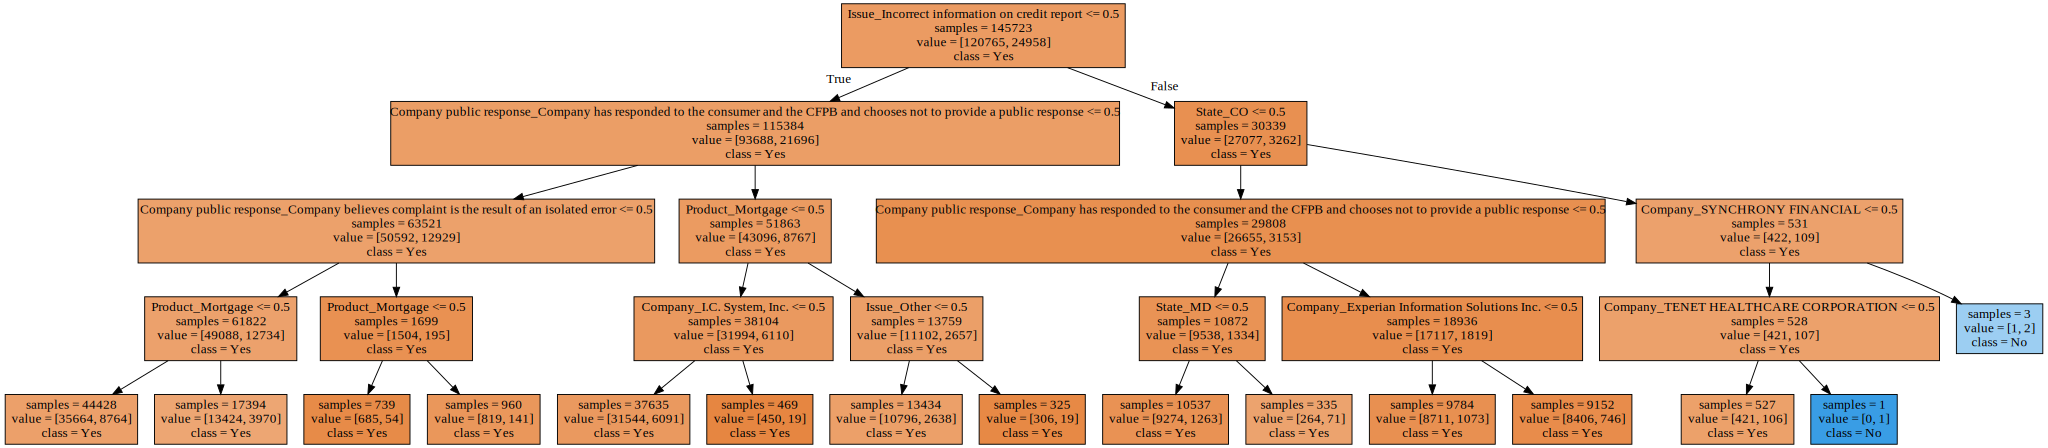

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file="dtree.dot", class_names=["Yes", "No"],
               feature_names=X.columns, impurity=False, filled=True)
import graphviz

with open("dtree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [21]:
print("Feature importancs:{}\n".format(dtree.feature_importances_))
print(dict(zip(data.columns, dtree.feature_importances_)))

Feature importancs:[0. 0. 0. ... 0. 0. 0.]

{'Product': 0.0, 'Issue': 0.0, 'Company public response': 0.0, 'Company': 0.0, 'State': 0.0, 'Timely response?': 0.09687352848220089, 'Consumer disputed?': 0.0}


### Use Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

#Use X_train, X_test same as the ones used in decision tree
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
model_evaluate(forest, X_test, y_test

Accuracy on training set: 0.874
Accuracy on test set: 0.816


### Work on feature selection

#### Univariate Statitics

In [23]:
from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)





/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 5478 5479 5538] are constant.
  UserWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(145723, 5544)


TypeError: can only concatenate str (not "tuple") to str

In [24]:
print(X_train.shape)
print("After feature selection ",X_train_selected.shape)

(145723, 5544)
After feature selection  (145723, 2772)


In [31]:
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

from sklearn.linear_model import LogisticRegression
for c in [0.01, 1, 100]:
    classifier = LogisticRegression(C=c)
    classifier.fit(X_train_selected, y_train)
    print("Logistic regression result with regularization parameter C=", str(c))
    print("Accuracy on training set: {:.3f}".format(classifier.score(X_train_selected, y_train)))
    print("Accuracy on test set: {:.3f}".format(classifier.score(X_test_selected, y_test)))


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result with regularization parameter C= 0.01
Accuracy on training set: 0.829
Accuracy on test set: 0.829


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result with regularization parameter C= 1
Accuracy on training set: 0.829
Accuracy on test set: 0.829


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result with regularization parameter C= 100
Accuracy on training set: 0.831
Accuracy on test set: 0.827


#### Model-based feature selection

In [34]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=2), threshold="median")
select.fit(X_train, y_train)


X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

from sklearn.linear_model import LogisticRegression
for c in [0.01, 1, 100]:
    classifier = LogisticRegression(C=c)
    classifier.fit(X_train_selected, y_train)
    print("Logistic regression result with regularization parameter C=", str(c))
    print("Accuracy on training set: {:.3f}".format(classifier.score(X_train_selected, y_train)))
    print("Accuracy on test set: {:.3f}".format(classifier.score(X_test_selected, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result with regularization parameter C= 0.01
Accuracy on training set: 0.829
Accuracy on test set: 0.829


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result with regularization parameter C= 1
Accuracy on training set: 0.829
Accuracy on test set: 0.829


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression result with regularization parameter C= 100
Accuracy on training set: 0.831
Accuracy on test set: 0.827


In [38]:
X_train_selected.shape

(145723, 5544)

In [37]:
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)